#connection

##Shin lInk

In [ ]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=D%2FhdJvjqj1uSF9pkzoM16CQvvBx7X6483xScsvUsed4'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fww

In [ ]:
!cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/bin/bash: line 0: cd: gdrive: No such file or directory
mkdir: cannot create directory ‘My Drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


###Load First Dataset

In [ ]:
import os

#path_data='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Final_3d_EMG_data.pkl'
#load pickle file
path_data='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/100_frequency/Final_3d_EMG_data.pkl'

import pickle
import pandas as pd
#pd.read_pickle(f)
with open(path_data, 'rb') as f:
    #EMG_data = pickle.load(f)
    EMG_data = pd.read_pickle(f)

#path_label='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Final_3d_label.pkl'
path_label='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/100_frequency/Final_3d_label.pkl'

with open(path_label, 'rb') as f:
    #EMG_data = pickle.load(f)
    EMG_label = pd.read_pickle(f)
'''
with open(os.path.join(path,'sixl_EMG_data.pickle'), 'rb') as f:
    EMG_data = pickle.load(f)

with open(os.path.join(path,'sixl_EMG_label.pickle'), 'rb') as f:
    EMG_label = pickle.load(f)
'''

channel=8
num_classes=6

FileNotFoundError: ignored

###Self LInk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
path_data='/content/drive/MyDrive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Final_3d_EMG_data.pkl'

#load pickle file

import pickle
import pandas as pd
#pd.read_pickle(f)
with open(path_data, 'rb') as f:
    #EMG_data = pickle.load(f)
    EMG_data = pd.read_pickle(f)

path_label='/content/drive/MyDrive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Final_3d_label.pkl'

with open(path_label, 'rb') as f:
    #EMG_data = pickle.load(f)
    EMG_label = pd.read_pickle(f)
'''
with open(os.path.join(path,'sixl_EMG_data.pickle'), 'rb') as f:
    EMG_data = pickle.load(f)

with open(os.path.join(path,'sixl_EMG_label.pickle'), 'rb') as f:
    EMG_label = pickle.load(f)
'''

channel=8
num_classes=6

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(channel, num_classes)

8 6


##six_hand gesture

In [ ]:
%pip install pandas==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.4.1 which is incompatible.


#Second Data

In [ ]:
import pickle
import pandas as pd
#path_label='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Final_3d_label.pkl'
path_label='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Second_EMG.pkl'

with open(path_label, 'rb') as f:
    #EMG_data = pickle.load(f)
    second_EMG_label = pd.read_pickle(f)

EMG_data=second_EMG_label['data']
EMG_label=second_EMG_label['label']

channel=12
num_classes=10

## Filtering

In [ ]:
sample=EMG_data.shape[0]
data=EMG_data.reshape(sample,-1)
import numpy as np

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import scipy


def abs_val_filter(data):
    return abs(data.copy())

def butterworth_low_pass_filter(data,
                                frequency=500,
                                lp_filter=5,
                                order=4):

    lp_filter = lp_filter/(frequency/2)

    # Create a lowpass butterworth signal
    B, A = scipy.signal.butter(order,
                               lp_filter,
                               btype='lowpass')

    # Apply the lowpass signal filter to EMG data
    smooth_emg = scipy.signal.filtfilt(B,
                                       A,
                                       data)
    return smooth_emg
def holt_smoothing(data,
                  s_level = 0.5,
                  s_slope = 0.1):
    smoothed = []
    for i in data:
        smoothed.append(Holt(i).fit(smoothing_level=s_level, smoothing_slope=s_slope).fittedvalues[:])
    return np.array(smoothed)

df_abs = abs_val_filter(data)
df_holt = holt_smoothing(data, s_level = 0.03, s_slope = 0.02)
df_butter = butterworth_low_pass_filter(data, frequency=5000, lp_filter=25, order=5)

<ipython-input-12-7050da6d40f5>:34: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  smoothed.append(Holt(i).fit(smoothing_level=s_level, smoothing_slope=s_slope).fittedvalues[:])


In [ ]:
EMG_data=df_butter.reshape(sample,-1,12)

##Train Test

In [ ]:
#print(EMG_data.shape)
#Features_train = Traindata[Traindata.columns[0:8]]
import numpy as np
import torch
'''
Data=EMG_data[EMG_data.columns[0:8]]
Labels=EMG_data[EMG_data.columns[8:9]]

Data1=Data.drop(Data.index[0])
Data1=Data1.iloc[1: , :]
Labels1=Labels.drop(Labels.index[0])
Labels1=Labels1.iloc[1: , :]
P=np.array(Data1)
L=np.squeeze(np.array(Labels1))
'''
P=EMG_data
L=EMG_label

import torch.optim as optim
import numpy as np
from datetime import datetime
import time
import argparse
import os
batch_size=8
learning_rate=1e-3
cuda=True
workers=0
epochs=10
patiences=500
dp_rate=0.1
TIME_LEN=1
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(P,L, test_size=0.15, random_state=42,shuffle=True)
print('X_train.shape: ',X_train.shape)
print('X_test.shape',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

frames=X_train.shape[1]
X_train= np.array(X_train, dtype=np.float16)
X_test= np.array(X_test, dtype=np.float16)
X_train= torch.from_numpy(X_train)
X_test= torch.from_numpy(X_test)

X_train.shape:  (25481, 50, 8)
X_test.shape (4497, 50, 8)
y_train (25481,)
y_test (4497,)


In [ ]:
X=np.array(X_train)
print(X_train[20].shape)
a=X_train[1:10]
print(type(a))

print(X_train.shape[0])

torch.Size([50, 8])
<class 'torch.Tensor'>
25481


##My Dataset

In [ ]:
import random
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from random import randint,shuffle

from torchvision import transforms
class Hand_Dataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, X,Y):
        """
        Args:
            data: a list of video and it's label
            time_len: length of input video
            use_data_aug: flag for using data augmentation
        """


        #self.transform = transforms.Compose([transforms.ToTensor()])
        self.data = X
        self.Y=Y



    def __len__(self):
        return len(self.data)  # for triaing 2660, test=140

    def __getitem__(self, ind):   # for training 0 to 2660, for test 0 to 140
        #print("ind:",ind)
        #'''

        data_ele = self.data[ind]   # data_ele= ['sekleton]['label]  skeleton=[n][22][3]
        #hand skeleton
        skeleton = data_ele #N*22*3  N= 21,46,71 randomly
        skeleton = np.array(skeleton)
        #data_ele = self.data[ind]   # data_ele= ['sekleton]['label]  skeleton=[n][22][3

        #hand skeleton
        #skeleton = data_ele["skeleton"]  #N*22*3  N= 21,46,71 randomly
        skeleton = np.array(skeleton)


        skeleton = torch.from_numpy(skeleton).float()

        label = int(self.Y[ind]) #
        #print('skeleton', type(skeleton))

        #'''

        #sample = {'skeleton': skeleton, "label" : label}
        #return self.transform(self.data[ind]), self.transform(self.y[ind])

        return skeleton, label

In [ ]:
train_dataset = Hand_Dataset(X_train, y_train)   # for 1*8*22*3  label=1


test_dataset =  Hand_Dataset(X_test, y_test)


#print("Dataset ", dataset_name)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size, shuffle=True, drop_last=True,num_workers=workers, pin_memory=False)

val_loader = torch.utils.data.DataLoader(
    test_dataset,drop_last=True,
    batch_size=batch_size, shuffle=False,
    num_workers=workers, pin_memory=False)


In [ ]:
for i, sample_batched in enumerate(train_loader):
    print(sample_batched[0].shape)
    print('i')
    break

torch.Size([8, 50, 8])
i


#Model

In [ ]:

import random
import math
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from random import randint,shuffle
import torch.nn as nn
import torch.nn.functional as F

class LayerNorm(nn.Module):
    "Construct a layernorm module (See citation for details)."
    def __init__(self, ft_dim, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(ft_dim))
        self.b_2 = nn.Parameter(torch.zeros(ft_dim))
        self.eps = eps

    def forward(self, x):
        #[batch, time, ft_dim)
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2


##Bert_Self_Attention
https://github.com/datnnt1997/multi-head_self-attention

In [ ]:

class BertSelfAttention(nn.Module):
      def __init__(self, config):
        super().__init__()
        assert config["input_size"] % config["num_of_attention_heads"] == 0, "The hidden size is not a multiple of the number of attention heads"

        self.num_attention_heads = config['num_of_attention_heads']
        self.attention_head_size = int(config['input_size'] / config['num_of_attention_heads'])
        self.all_head_size = self.num_attention_heads * self.attention_head_size

        self.query = nn.Linear(config['input_size'], self.all_head_size)
        self.key = nn.Linear(config['input_size'], self.all_head_size)
        self.value = nn.Linear(config['input_size'], self.all_head_size)

        self.dense = nn.Linear(config['input_size'], config['output_size'])

      def transpose_for_scores(self, x):
        new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)

      def forward(self, hidden_states):
        mixed_query_layer = self.query(hidden_states)                             # [Batch_size x Seq_length x Hidden_size]
        mixed_key_layer = self.key(hidden_states)                                 # [Batch_size x Seq_length x Hidden_size]
        mixed_value_layer = self.value(hidden_states)                             # [Batch_size x Seq_length x Hidden_size]

        query_layer = self.transpose_for_scores(mixed_query_layer)                # [Batch_size x Num_of_heads x Seq_length x Head_size]
        key_layer = self.transpose_for_scores(mixed_key_layer)                    # [Batch_size x Num_of_heads x Seq_length x Head_size]
        value_layer = self.transpose_for_scores(mixed_value_layer)                # [Batch_size x Num_of_heads x Seq_length x Head_size]


        attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2)) # [Batch_size x Num_of_heads x Seq_length x Seq_length]
        attention_scores = attention_scores / math.sqrt(self.attention_head_size) # [Batch_size x Num_of_heads x Seq_length x Seq_length]
        attention_probs = nn.Softmax(dim=-1)(attention_scores)                    # [Batch_size x Num_of_heads x Seq_length x Seq_length]
        context_layer = torch.matmul(attention_probs, value_layer)                # [Batch_size x Num_of_heads x Seq_length x Head_size]

        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()            # [Batch_size x Seq_length x Num_of_heads x Head_size]
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,) # [Batch_size x Seq_length x Hidden_size]
        context_layer = context_layer.view(*new_context_layer_shape)              # [Batch_size x Seq_length x Hidden_size]

        output =  self.dense(context_layer)

        return output

#input=batch*frame*channel

##Facebook Transformer

In [ ]:
import torch
import torch.nn as nn

class TimeSformer(nn.Module):
    def __init__(self, input_dim, num_frames, num_classes, patch_size=1, num_patches=16, embed_dims=256, num_heads=8, mlp_ratio=4):
        super().__init__()               #embeded dimension =dimension forward

        self.num_frames = num_frames

        # Embedding layer
        self.embed_dim = embed_dims
        self.proj = nn.Conv1d(input_dim, self.embed_dim, kernel_size=1)

        # Patch embedding layer
        self.patch_size = patch_size
        self.num_patches = num_patches
        self.patch_embed = nn.Conv1d(self.embed_dim, self.embed_dim, kernel_size=self.patch_size, stride=self.patch_size)
        self.num_patch_features = self.embed_dim // self.patch_size

        # Positional encoding
        #self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches, self.num_patch_features))
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_frames, self.embed_dim)) #my editing

        # Transformer layers
        self.transformer = nn.TransformerEncoder(nn.TransformerEncoderLayer(d_model=self.embed_dim, nhead=num_heads, dim_feedforward=int(self.embed_dim*mlp_ratio)), num_layers=2)

        # Output layer
        #self.fc = nn.Linear(self.embed_dim * self.num_frames, num_classes)  #128*256,10= 32768*10
        self.fc = nn.Linear(256, num_classes)  #128*256,10= 32768*10

    def forward(self, x):  #(16,1,128)
        # Embedding layer
        x = self.proj(x)  #torch.Size([16, 256, 128])
        #print('projection x',x.shape)

        # Patch embedding layer
        x = self.patch_embed(x)#torch.Size([16, 256, 16])   128/8
        #print('patch_embed.shape',x.shape)
        x = x.flatten(2).transpose(1, 2)  #([16, 16, 256])

        #print('x.shape',x.shape)
        #print('Pose_embed.shape',self.pos_embed.shape) #Pose_embed.shape torch.Size([1, 16, 32])

        # Positional encoding
        x = x + self.pos_embed  #x+pose_embed torch.Size([16, 16, 256])
        #print('x+pose_embed', x.shape)

        # Transformer layers
        x = self.transformer(x)
        #print('transformer shape',x.shape)#([16, 16, 256]  #transformer shape torch.Size([16, 128, 256])


        # Output layer
        #x = x.flatten(1)
        #print('shape of flatten',x.shape)
        x = self.fc(x)
        return x
#input=batch*channel*frame

##TCN

In [ ]:
#https://github.com/morgengramlich/temporal_convolutional_network
import torch
from torch import nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    '''Residual block to use in TCN'''

    def __init__(self, input_size, hidden_size, kernel_size, dilation):
        super(ResidualBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.kernel_size = kernel_size
        self.dilation = dilation
        self.pad1 = nn.ConstantPad1d(((self.kernel_size-1)*dilation, 0), 0.0)
        self.conv1 = nn.utils.weight_norm(nn.Conv1d(
            in_channels=self.input_size,
            out_channels=self.hidden_size,
            kernel_size=self.kernel_size,
            dilation=dilation,
        ))
        self.dropout1 = nn.Dropout(p=0.2)
        self.pad2 = nn.ConstantPad1d(((self.kernel_size-1)*dilation, 0), 0.0)
        self.conv2 = nn.utils.weight_norm(nn.Conv1d(
            in_channels=self.hidden_size,
            out_channels=self.input_size,
            kernel_size=self.kernel_size,
            dilation=dilation,
        ))
        self.dropout2 = nn.Dropout(p=0.2)

    def forward(self, x):
        '''One step of computation'''
        output = self.pad1(x)
        output = F.relu(self.conv1(output))
        output = self.dropout1(output)
        output = self.pad2(output)
        output = F.relu(self.conv2(output))
        output = self.dropout2(output)
        return F.relu(x + output)

class TCN(nn.Module):
    '''Temporal Convolutional Network'''

    def __init__(self, input_size, ouput_size, kernel_sizes, dilations):
        super(TCN, self).__init__()
        if len(kernel_sizes) != len(dilations):
            raise ValueError('kernel_sizes and dilations must be of the same size')
        self.input_size = input_size
        self.output_size=ouput_size
        self.kernel_sizes = kernel_sizes
        self.dilations = dilations
        self.residuals = nn.Sequential()
        for n in range(len(kernel_sizes)):
            self.residuals.append(ResidualBlock(self.input_size, self.input_size, self.kernel_sizes[n], self.dilations[n]))
        self.dropout = nn.Dropout(p=0.2)
        self.fc = nn.Linear(self.input_size, self.output_size)

    def forward(self, value):
        '''One step of computation'''
        output = torch.permute(value, (0, 2, 1))
        output = self.residuals(output)
        output = torch.permute(output, (0, 2, 1))
        output = self.dropout(output)
        output = self.fc(output)
        return output
#input=batch*frame*channel

In [ ]:
import torch

# Example input
batch_size = 8
max_time = 5
n_input = 8
kernel=[2,2,2]
dilation=[2,2,2]


# Create a PyTorch tensor with the appropriate shape
#input_dim=input_dim, num_frames=num_frames, num_classes=num_classes
input_tensor = torch.randn(batch_size, 100,n_input)
frames=input_tensor.shape[1]


model=TCN(8,32, kernel,dilation)
a=model(input_tensor)

print(a.shape)

torch.Size([8, 100, 32])


##NEW TCN Model
https://github.com/albertogaspar/dts/blob/master/dts/models/TCN.py

https://github.com/albertogaspar/dts/tree/master/dts/models

GCN: https://github.com/3dpose/GnTCN/blob/main/models/networktcn.py

https://github.com/yuyq96/D-TDNN/tree/master/model

https://github.com/Altaheri/EEG-ATCNet/blob/main/attention_models.py

##TCN_Previous

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class TCN_priveous(nn.Module):
    def __init__(self, input_shape=None, residual_blocks=10, tcn_layers=2, filters=12, filters_size=3,
                 dropout_rate=None, weight_decay=1e-4, depth=40, seed=0, masking=False, mask_value=-10.0):
        super(TCN, self).__init__()

        if type(tcn_layers) is list:
            if len(tcn_layers) != residual_blocks:
                raise AssertionError(
                    'Number of residual blocks have to be same length to specified layers')
        elif tcn_layers == -1:
            tcn_layers = depth // residual_blocks
            tcn_layers = [tcn_layers for _ in range(residual_blocks)]
        else:
            tcn_layers = [tcn_layers for _ in range(residual_blocks)]

        if type(filters) is list:
            if type(tcn_layers) is list:
                for i, layer_size in enumerate(tcn_layers):
                    if layer_size != len(filters[i]):
                        raise AssertionError(
                            'Number of filters have to be same to layers. Found filters {}, layers {}'.format(np.sum(np.array(filters).shape), np.sum(tcn_layers)))
            elif np.prod(np.array(filters).shape) != np.sum(tcn_layers):
                raise AssertionError(
                    'Number of filters have to be same to layers. Found filters {}, layers {}'.format(np.sum(np.array(filters).shape), np.sum(tcn_layers)))
        else:
            filters = [[filters for _ in range(tcn_layers[i])] for i in range(residual_blocks)]

        if type(filters_size) is list:
            if np.prod(np.array(filters_size).shape) != np.sum(tcn_layers):
                raise AssertionError(
                    'Number of filters_size have to be same to layers. Found filters_size {}, layers {}'.format(np.sum(np.array(filters_size).shape), np.sum(tcn_layers)))
        else:
            filters_size = [[filters_size for _ in range(tcn_layers[i])] for i in range(residual_blocks)]

        self.masking = masking
        self.mask_value = mask_value

        self.seq_input = nn.Sequential()
        if self.masking:
            self.seq_input.add_module('masking', nn.ConstantPad1d((1, 0), 0))

        self.rf = 1
        self.nb_dilation = 1
        self.res_blocks = nn.ModuleList()

        for block in range(residual_blocks):
            self.res_blocks.append(ResidualBlock(tcn_layers[block], filters[block], filters_size[block], dropout_rate, weight_decay, seed))

    def forward(self, x):
        x = self.seq_input(x)
        for block in self.res_blocks:
            x, self.nb_dilation, self.rf = block(x, self.nb_dilation, self.rf)
        return x


class CausalConv1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation=1, **kwargs):
        super().__init__()
        self.padding = dilation * (kernel_size - 1)
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation, **kwargs)

    def forward(self, x):
        x = F.pad(x, (self.padding, 0))
        x = self.conv(x)
        return x[:, :, :-self.padding]

#import torch
#import torch.nn as nn
#import torch.nn.functional as F


def residual_block(x, nb_layers, nb_channels, filters, nb_dilation, rf, dropout_rate=None, regularizer=None, initializer='glorot_uniform'):
    """
    Creates a residual block and concatenates inputs
    """
    print('before CV')
    print('nb_channels[-1] :',nb_channels[-1])
    print("(1,) :", (1,))
    cb = nn.Conv1d(in_channels=nb_channels[-1], out_channels=nb_channels[-1], kernel_size=1,
                   stride=1, padding=0, bias=True)
    nn.init.xavier_uniform_(cb.weight)
    if regularizer is not None:
        cb.weight_regularizer = regularizer
    cb = cb(x)
    print('After Cb',cb.shape)
    for i in range(nb_layers):
        x, nb_dilation, rf = tcn_block(
            x, nb_channels[i], filters[i], nb_dilation, rf, dropout_rate, regularizer, initializer)
    x = cb + x
    return x, nb_dilation, rf


def tcn_block(x, nb_channels, filter_size, nb_dilation, rf, dropout_rate=None, regularizer=None, initializer='glorot_uniform'):
    """
    Creates a convolution block consisting of Conv-ReLU-WeightNorm-Dropout.
    Optional: dropout
    """
    # Standard (Conv-ReLU-WeightNorm-Dropout)
    print('nb channel:',nb_channels, 'filter_size :',filter_size,'b_dilation :',nb_dilation,'regularizer:',regularizer,'initializer:',initializer)
    print('In TCN block before CalcualConv1D: x.shape',x.shape)
    conv_layer = CausalConv1D(in_channels=x.shape[1], out_channels=nb_channels, kernel_size=filter_size, dilation=nb_dilation)
    #nn.init.xavier_uniform_(conv_layer.weight)
    #x = conv_layer(x)

    print('In TCN block after CalcualConv1D:')
    print('x.shape before activation', x.shape)
    x = nn.ReLU()(x)
    print('x.shape After activation', x.shape)
    # Dropout
    if dropout_rate:
        x = nn.Dropout(p=dropout_rate)(x)
    rf = rf + (filter_size-1)*nb_dilation
    nb_dilation *= 2
    return x, nb_dilation, rf






##Classification_MOdule

In [ ]:
class Classification_module_1(nn.Module):
    '''Residual block to use in TCN'''

    def __init__(self,input_size, output_size):
        super(Classification_module, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.kernel_size = kernel_size
        self.dilation = dilation
        self.pad1 = nn.ConstantPad1d(((self.kernel_size-1)*dilation, 0), 0.0)
        self.conv1 = nn.utils.weight_norm(nn.Conv1d(
            in_channels=self.input_size,
            out_channels=self.hidden_size,
            kernel_size=self.kernel_size,
            dilation=dilation,
        ))
        self.dropout1 = nn.Dropout(p=0.2)
        self.pad2 = nn.ConstantPad1d(((self.kernel_size-1)*dilation, 0), 0.0)
        self.conv2 = nn.utils.weight_norm(nn.Conv1d(
            in_channels=self.hidden_size,
            out_channels=self.input_size,
            kernel_size=self.kernel_size,
            dilation=dilation,
        ))
        self.dropout2 = nn.Dropout(p=0.2)

    def forward(self, x):
        '''One step of computation'''
        output = self.pad1(x)
        output = F.relu(self.conv1(output))
        output = self.dropout1(output)
        output = self.pad2(output)
        output = F.relu(self.conv2(output))
        output = self.dropout2(output)
        return F.relu(x + output)

##my Classification module

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Classification_module(nn.Module):
    def __init__(self,input, output):
        super(Classification_module, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input, out_channels=96, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=96, out_channels=96, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=96, out_channels=96, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv1d(in_channels=48, out_channels=192, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv1d(in_channels=192, out_channels=192, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv1d(in_channels=192, out_channels=192, kernel_size=3, stride=2, padding=1)
        self.conv7 = nn.Conv1d(in_channels=96, out_channels=192, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv1d(in_channels=192, out_channels=192, kernel_size=1, stride=1, padding=0)
        self.conv9 = nn.Conv1d(in_channels=192, out_channels=output, kernel_size=1, stride=1, padding=0)
        self.bn = nn.BatchNorm1d(num_features=output)
        self.pool = nn.AdaptiveAvgPool1d(output_size=output)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.dropout(x, p=0.2)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.dropout(x, p=0.5)
        x = F.max_pool2d(x, kernel_size=2)
        #print('F.max_pool2d(x, kernel_size=2) shape',x.shape)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.dropout(x, p=0.5)
        #x = F.max_pool2d(x, kernel_size=2)
        #x = F.relu(self.conv7(x))
        #x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = self.bn(x)
        x = self.pool(x)
        x = F.softmax(x, dim=1)
        return x

##Only CNN

In [ ]:
import torch
import numpy as np
import xlrd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim


class Cnn1d(nn.Module):

    def __init__(self,input=8, output=32,
                 #num_class = 7
                 # in_size, out_channels,
                 # # n_len_seg,
                 # n_classes,
                 # # device,
                 # verbose=False
                 ):
        super(Cnn1d, self).__init__()
        # self.n_len_seg = n_len_seg
        # self.n_classes = n_classes
        # self.in_channels = in_channels
        # self.out_channels = out_channels
        # self.device = device
        # self.verbose = verbose

        # input: (N, C, L) (630, 80, 10)

        # (630, 80, 10)
        self.conv1 = nn.Sequential(
            nn.Conv1d(input, 81, kernel_size=3, stride=1, padding=2), # 81, 10
            nn.BatchNorm1d(81),
            nn.ReLU(),
            nn.MaxPool1d(3, stride=1) ) # 81, 5
        # (630, 81, 5)
        self.conv2 = nn.Sequential(
            nn.Conv1d(81, 100, kernel_size=3, stride=1, padding=2),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.MaxPool1d(3, stride=1)
        )  # 27, 2
        self.conv3 = nn.Sequential(
            nn.Conv1d(100,100, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(100),
            nn.ReLU())
        # 9, 2
        self.conv4 = nn.Sequential(
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc = nn.Linear(100, output)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        # print("input: ", x.shape)   # torch.Size([1, 80, 10])
        x=x.permute(0,2,1)
        out = self.conv1(x)
        #print("conv1:", out.shape)  # torch.Size([1, 80, 10])
        out = self.conv2(out)
        #print("conv2", out.shape)
        out = self.conv3(out)
        #print("conv3", out.shape)
        out = self.conv4(out)
        #print("conv4", out.shape)
        # out = out.view(out.size(0), -1)
        #print('out.shape',out.shape)
        #out = out.view(x.shape[0], out.size(1) * out.size(2))

        #out = out.sum(1) / out.shape[1]
        #print('out.shape',out.shape)
        logit = self.fc(out)

        logit = self.activation(logit)
        # print("fc:", logit.shape) # fc: torch.Size([1, 7])

        return logit
#input=batch*channel*frame

In [ ]:

import torch

# Example input
batch_size = 8
max_time = 5
n_input = 8
kernel=[2,2,2]
dilation=[2,2,2]


# Create a PyTorch tensor with the appropriate shape
#input_dim=input_dim, num_frames=num_frames, num_classes=num_classes
input_tensor = torch.randn(batch_size, 100,n_input)
frames=input_tensor.shape[1]


model=Cnn1d(input=8, output=32)
a=model(input_tensor)

print(a.shape)

torch.Size([8, 100, 32])


##Musa_EMG_Final_model

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F
temporal_window_size = 3
ALL=21
JOINT_NUMBER=ALL
print(JOINT_NUMBER)
CUDA_LAUNCH_BLOCKING=1
class Musa_EMG_Model(nn.Module):
    def __init__(self, channel, num_classes, frame,dp_rate=0.1):
        super(Musa_EMG_Model, self).__init__()
        self.kernel=[2,2,2]
        self.dilation=[2,2,2]
        self.frame=frame
        self.input_map = nn.Sequential(
            nn.Linear(channel, 256),  #input size, hidden layer size
            nn.ReLU(),
            LayerNorm(256),
            nn.Dropout(0.1)   )

        self.input=channel
        #self.input=12
        #self.config1 = {"num_of_attention_heads": 2,"input_size": 8, "output_size":32}
        self.config1 = {"num_of_attention_heads": 2,"input_size": channel, "output_size":32}
        self.output=32;

        #self.tcn_input_1 = 64
        self.config2 = {"num_of_attention_heads": 2,"input_size": 32, "output_size":64}
        self.tcn_input_2 = 64

        self.config3 = {"num_of_attention_heads": 2,"input_size": 64, "output_size":128}
        self.tcn_input_3 = 128

        self.config4 = {"num_of_attention_heads": 2,"input_size": 128, "output_size":256}
        self.tcn_input_4 = 256

        self.config5 = {"num_of_attention_heads": 2,"input_size": 256, "output_size":512}
        self.tcn_input_5 = 512

        self.config6 = {"num_of_attention_heads": 2,"input_size": 512, "output_size":256}
        tcn_input_6 = 256


        self.att1 = BertSelfAttention(self.config1)
        #model = TimeSformer(input_dim=input_dim, num_frames=num_frames, num_classes=num_classes)
        #self.trans1=TimeSformer(self.input,self.frame,self.output) #usable thing
        self.tcn1=TCN(32,32,self.kernel,self.dilation)
        #self.cnn1d=Cnn1d(self.input,32)
        #self.incpetion=InceptionResNet(self.input,32)


        #self.tcnn1=TCN(128,self.kernel,self.dilation)
        #'''
        self.att2 = BertSelfAttention(self.config2)
        self.tcn2=TCN(self.tcn_input_2,self.tcn_input_2,self.kernel,self.dilation)

        self.att3 = BertSelfAttention(self.config3)
        self.tcn3=TCN(self.tcn_input_3,self.tcn_input_3,self.kernel,self.dilation)

        self.att4 = BertSelfAttention(self.config4)
        self.tcn4=TCN(self.tcn_input_4,self.tcn_input_4,self.kernel,self.dilation)

        self.att5 = BertSelfAttention(self.config5)
        self.tcn5=TCN(self.tcn_input_5,self.tcn_input_5,self.kernel,self.dilation)

        self.att6 = BertSelfAttention(self.config6)
        #self.cls = nn.Linear(32, num_classes)

        #'''
        final_channel=512
        self.class_block = nn.Sequential(  #https://github.com/Laknath1996/sEMG-Hand-Gesture-Recognition/blob/master/src/tma/models/nn_models.py

        nn.Linear(final_channel, 256),  #input size, hidden layer size
        nn.LeakyReLU(0.1),

        nn.Dropout(0.1),
        #nn.Linear(64, num_classes),  #input size, hidden layer size
        #nn.LeakyReLU(),
        )

        self.class_module=Classification_module(128,10)
        self.cls = nn.Linear(512, num_classes)

        #self.cls = nn.Linear(128, num_classes) #combined 4
        #self.cls = nn.Linear(256, num_classes)

    def forward(self, x):
        # input shape: [batch_size, time_len, joint_num, 3]
        initial_feature=self.input_map(x)
        #print(initial_feature.shape)
        att1=self.att1(x)
        #tcn1=self.tcn1(x)
        #att1=self.att1(x)
        tcn1=self.tcn1(att1)

        #print('shape',tcn1.shape)
        #att1=self.att1(initial_feature)
        #input_trans1=x.permute(0,2,1)
        #trans1=self.trans1(input_trans1)
        #cnn1d=self.cnn1d(initial_feature)

        #inception=self.incpetion(x)
        #inception=inception.permute(0,2,1)

        #'''
        att2=self.att2(tcn1)
        tcn2=self.tcn2(att2)

        att3=self.att3(tcn2)
        tcn3=self.tcn3(att3)
        #print('tcn3',tcn3.shape)

        att4=self.att4(tcn3)
        #print('att4',att4.shape)
        tcn4=self.tcn4(att4)

        att5=self.att5(tcn4)
        tcn5=self.tcn5(att5)

        att6=self.att6(tcn5)
        #out=att6
        out=torch.cat((att6,initial_feature),axis=2)
        #'''

        #tcn1=torch.cat((tcn1,att1,initial_feature),axis=2)
        #tcn1=torch.cat((tcn1,att1,trans1,initial_feature),axis=2)
        #tcn1=torch.cat((tcn1,att1,initial_feature),axis=2)

        #print(tcn1.shape,att1,trans1,initial_feature,cnn1d )
        #tcn1=torch.cat((tcn1,att1,trans1,initial_feature,cnn1d),axis=2)
        #tcn1=self.tcnn(tcn1)


        #tcn1=torch.cat((tcn1,att1),axis=2)
        #print('shape tcn1:',tcn1)
        #print('Shapel tcn1',tcn1.shape)
        #x = tcn1.view(tcn1.size(0),tcn1.size(2),tcn1.size(1))
        #print('Shapel reshae x',x.shape)

        #tcn1=self.class_module(x)
        #print('Shapel class module',tcn1.shape)
        #tcn1= tcn1.view(tcn1.size(0),tcn1.size(2),tcn1.size(1))
        #print('Shapel reshape',tcn1.shape)
        #tcn1=self.class_block(tcn1)
        #print('tcn1',tcn1.shape)
        #tcn1=inception
       # out=self.class_block(out)
        x = out.sum(1) / out.shape[1]
        #x=tcn1
        pred = self.cls(x)
        return pred

21


In [ ]:

import torch
# Example input
batch_size = 8
max_time = 5
#channel = 8
kernel=[2,2,2]
dilation=[2,2,2]
frames=50
print(channel, num_classes)
# Create a PyTorch tensor with the appropriate shape
#input_dim=input_dim, num_frames=num_frames, num_classes=num_classes
input_tensor = torch.randn(batch_size,frames,  channel)
frames=input_tensor.shape[1]

model=Musa_EMG_Model(channel,num_classes,frames)
a=model(input_tensor)

print(a.shape)



8 6
torch.Size([8, 6])


#Transformer

##EfficientNet1D

In [ ]:
class EfficientNet1D(nn.Module):
    def __init__(self, model_name, num_classes):
        super(EfficientNet1D, self).__init__()
        self.num_classes = num_classes
        self.model = EfficientNet.from_pretrained(model_name)
        self.model._conv_stem = nn.Conv1d(32, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.model._fc = nn.Linear(self.model._fc.in_features, num_classes)

    def forward(self, x):
        x = x.transpose(1, 2) # Swap time step and channel dimensions
        x = self.model(x)
        return x


In [ ]:
model = EfficientNet1D('efficientnet-b0', num_classes=10)
input_data = torch.randn((32, 100,8))
output = model(input_data)
print(output.shape) # Exp

##InceptionNet
https://pypi.org/project/pytorchcv/

In [ ]:
import torch
import torch.nn as nn

class InceptionResNet(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(InceptionResNet, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_shape, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(num_features=32)
        self.relu1 = nn.ReLU()

        self.block1 = InceptionResNetBlock(32, 32, 32, 64)
        self.block2 = InceptionResNetBlock(64, 32, 32, 64)
        self.block3 = InceptionResNetBlock(64, 32, 32, 128)

        self.block4 = InceptionResNetBlock(128, 64, 64, 256)
        self.block5 = InceptionResNetBlock(256, 64, 64, 256)
        self.block6 = InceptionResNetBlock(256, 64, 64, 256)
        self.block7 = InceptionResNetBlock(256, 64, 64, 256)

        self.block8 = InceptionResNetBlock(256, 128, 128, 512)
        self.block9 = InceptionResNetBlock(512, 128, 128, 512)
        self.block10 = InceptionResNetBlock(512, 128, 128, 512)
        self.block11 = InceptionResNetBlock(512, 128, 128, 512)

        self.block12 = InceptionResNetBlock(512, 256, 256, 1024)
        self.block13 = InceptionResNetBlock(1024, 256, 256, 1024)
        self.block14 = InceptionResNetBlock(1024, 256, 256, 32)

        self.avgpool = nn.AdaptiveAvgPool1d(output_size=1)
        self.dropout = nn.Dropout(p=0.2)
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        # Stem layers
        x=x.permute(0,2,1)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        # Inception-ResNet-A blocks
        x = self.block1(x)  #torch.Size([8, 32, 100])
        #print('self.block1(x)',x.shape)
        x = self.block2(x)

        x = self.block3(x)

        # Inception-ResNet-B blocks
        x = self.block4(x)
        x = self.block5(x)
        x = self.block6(x)
        x = self.block7(x)

        # Inception-ResNet-C blocks
        x = self.block8(x)
        x = self.block9(x)
        x = self.block10(x)
        x = self.block11(x)

        # Inception-ResNet-D blocks
        x = self.block12(x)
        x = self.block13(x)
        x = self.block14(x)
        #print('self.block14(x)',x.shape)

        #x = self.avgpool(x)
        #x = x.view(x.size(0), -1)
        x = self.dropout(x)

        # Output layer
        #x = self.fc(x)

        return x

class InceptionResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels_1, out_channels_2, out_channels_3):
        super(InceptionResNetBlock, self).__init__()

        self.in_channels=in_channels
        self.out_channels_1=out_channels_1
        self.out_channels_2=out_channels_2
        self.out_channels_3=out_channels_3

        self.branch1 = nn.Sequential(
        nn.Conv1d(self.in_channels,   self.out_channels_1, kernel_size=1),
        nn.BatchNorm1d(out_channels_1),
        nn.ReLU()     )

        self.branch2 = nn.Sequential(
            nn.Conv1d(self.in_channels,   self.out_channels_2, kernel_size=1),
            nn.BatchNorm1d(  self.out_channels_2),
            nn.ReLU(),
            nn.Conv1d(  self.out_channels_2,   self.out_channels_2, kernel_size=3, padding=1),
            nn.BatchNorm1d(  self.out_channels_2),
            nn.ReLU()
         )

        self.branch3 = nn.Sequential(
            nn.Conv1d(  self.in_channels,   self.out_channels_3, kernel_size=1),
            nn.BatchNorm1d(  self.out_channels_3),
            nn.ReLU(),
            nn.Conv1d(  self.out_channels_3,   self.out_channels_3, kernel_size=3, padding=1),
            nn.BatchNorm1d(  self.out_channels_3),
            nn.ReLU(),
            nn.Conv1d(  self.out_channels_3,   self.out_channels_3, kernel_size=3, padding=1),
            nn.BatchNorm1d(  self.out_channels_3),
            nn.ReLU()
        )

        #self.conv = nn.Conv1d(  self.out_channels_1 +   self.out_channels_2 +   self.out_channels_3,   self.in_channels, kernel_size=1) #previous code
        self.conv = nn.Conv1d(  self.out_channels_1 +   self.out_channels_2 +   self.out_channels_3,   self.out_channels_3, kernel_size=1) #my changing
        self.residual=nn.Conv1d(self.in_channels, out_channels_3,kernel_size=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):

            identity = x

            x1 = self.branch1(x)
            x2 = self.branch2(x)
            x3 = self.branch3(x)

            out = torch.cat([x1, x2, x3], dim=1)
            out = self.conv(out)
            out = self.dropout(out)
            residual=self.residual(x)
            #residual = self.dropout(residual)
            out += residual
            #out = torch.cat([out,identity], dim=1)
            out = self.relu(out)
            return out


In [ ]:
model=InceptionResNet(32,32)
input_data = torch.randn(8, 100,32)
output = model(input_data)

print(output.shape) # Exp

self.block1(x) torch.Size([8, 64, 100])
self.block14(x) torch.Size([8, 32, 100])
torch.Size([8, 32, 100])


model = EfficientNet1D('efficientnet-b0', num_classes=10)
input_data = torch.randn((32, 1000))
output = model(input_data)
print(output.shape) # Exp

##Xception Net

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SeparableConv1d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, bias=False):
        super(SeparableConv1d, self).__init__()

        self.depthwise = nn.Conv1d(in_channels, in_channels, kernel_size, stride, padding, dilation, groups=in_channels, bias=bias)
        self.pointwise = nn.Conv1d(in_channels, out_channels, 1, 1, 0, 1, 1, bias=bias)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        return x


class XceptionBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, dilation=1, activate_before_residual=False):
        super(XceptionBlock, self).__init__()

        self.activate_before_residual = activate_before_residual
        self.skip = nn.Conv1d(in_channels, out_channels, 1, stride, 0, dilation, bias=False)
        self.bn1 = nn.BatchNorm1d(in_channels)
        self.relu1 = nn.ReLU(inplace=True)

        self.separable_conv1 = SeparableConv1d(in_channels, out_channels, kernel_size, stride, padding, dilation)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.relu2 = nn.ReLU(inplace=True)

        self.separable_conv2 = SeparableConv1d(out_channels, out_channels, kernel_size, 1, padding, dilation)
        self.bn3 = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        if self.activate_before_residual:
            x = self.bn1(x)
            x = self.relu1(x)

            residual = x
        else:
            residual = x
            x = self.bn1(x)
            x = self.relu1(x)

        x = self.separable_conv1(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.separable_conv2(x)
        x = self.bn3(x)

        x += self.skip(residual)

        return x


class Xception(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Xception, self).__init__()

        self.conv1 = nn.Conv1d(in_channels, 32, 3, 2, 0, bias=False)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv1d(32, 64, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU(inplace=True)

        self.block1 = XceptionBlock(64, 128, activate_before_residual=True)
        self.block2 = XceptionBlock(128, 256)
        self.block3 = XceptionBlock(256, 728)

        self.conv3 = nn.Conv1d(728, 1024, 3, 1, 1, bias=False)
        self.bn3 = nn.BatchNorm1d(1024)
        self.relu3 = nn.ReLU(inplace=True)

        self.conv4 = nn.Conv1d(1024, 1536, 3, 1, 1, bias=False)
        self.bn4 = nn.BatchNorm1d


##DenseNet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class DenseNet(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(DenseNet, self).__init__()

        self.densenet = nn.Sequential(
            nn.Conv1d(input_channels, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(512, 1024, kernel_size=3, padding=1),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        features = self.densenet(x)
        features = features.view(features.size(0), -1)
        output = self.classifier(features)
        return output


##Wavenet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class WaveNet(nn.Module):
    def __init__(self, in_channels, out_channels, n_blocks, n_layers, kernel_size, dilation_rate):
        super(WaveNet, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.n_blocks = n_blocks
        self.n_layers = n_layers
        self.kernel_size = kernel_size
        self.dilation_rate = dilation_rate

        self.layers = nn.ModuleList()

        # Add dilated causal convolutional layers to the model
        for i in range(self.n_blocks):
            for j in range(self.n_layers):
                dilation = 2**(j % self.dilation_rate)
                self.layers.append(nn.Conv1d(in_channels, out_channels, kernel_size, dilation=dilation, padding=0))
                self.layers.append(nn.ReLU())

        # Add final 1x1 convolutional layer
        self.final_conv = nn.Conv1d(in_channels, out_channels, 1)

    def forward(self, x):
        # Perform causal convolutional layers
        for layer in self.layers:
            x = layer(x)

        # Apply final 1x1 convolutional layer
        x = self.final_conv(x)

        return x

# Define hyperparameters
in_channels = 8
out_channels = 32
n_blocks = 3
n_layers = 10
kernel_size = 2
dilation_rate = 3
learning_rate = 0.001

# Define model and optimizer
model = WaveNet(in_channels, out_channels, n_blocks, n_layers, kernel_size, dilation_rate)



#call the model

In [ ]:
import torch.optim as optim
Classes=6
dp_rate=0.01
TIME_LEN=4
import torch
#torch.cuda.empty_cache()
import gc
#del variables
gc.collect()

torch.cuda.memory_summary(device=None, abbreviated=False)
def model_foreward(sample_batched,model,criterion):
    data = sample_batched[0].float()
    label = sample_batched[1]
    label = label.type(torch.LongTensor)
    label = label.cuda()
    label = torch.autograd.Variable(label, requires_grad=False)
    #print('data.shape',data.shape)
    score = model(data)
    loss = criterion(score,label)
    acc = get_acc(score, label)
    return score,loss, acc

def get_acc(score, labels):
    score = score.cpu().data.numpy()
    labels = labels.cpu().data.numpy()
    outputs = np.argmax(score, axis=1)
    return np.sum(outputs==labels)/float(labels.size)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark =False

#model=Musa_EMG_Model(channel,6,frames, dp_rate=0.1)
model=Musa_EMG_Model(channel,num_classes,frames, dp_rate=0.1)
#model=Cnn1d(input=8, output=6)

model = torch.nn.DataParallel(model).cuda()
model_solver = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
#........set loss
criterion = torch.nn.CrossEntropyLoss()
train_data_num = 2176
test_data_num = 100
iter_per_epoch = int(train_data_num / batch_size)

max_acc = 0
no_improve_epoch = 0
n_iter = 0
epochs=2000
patiences=1000


y_pr_final=0
y_original=0
model_1=0
max_batch_acc=0
max_batch_label=0
max_batch_pred=0
max_batch_label_cat=[]
max_batch_pred_cat=[]
max_batch_acc_all=[]

#***********training#***********
for epoch in range(epochs):
    print("\ntraining.............")
    model.train()
    start_time = time.time()
    train_acc = 0
    train_loss = 0
    for i, sample_batched in enumerate(train_loader):
        n_iter += 1
        #print("training i:",i)
        if i + 1 > iter_per_epoch:
            continue
        score,loss, acc = model_foreward(sample_batched, model, criterion)     #criterionloss function  Model=DG_sta

        model.zero_grad()
        loss.backward()
        #clip_grad_norm_(model.parameters(), 0.1)
        model_solver.step()

        train_acc += acc
        train_loss += loss



        #print(i)

    train_acc /= float(i + 1)
    train_loss /= float(i + 1)

    print("*** DHS  Epoch: [%2d] time: %4.4f, "
          "cls_loss: %.4f  train_ACC: %.6f ***"
          % (epoch + 1,  time.time() - start_time,
             train_loss.data, train_acc))

    start_time = time.time()

    #adjust_learning_rate(model_solver, epoch + 1, args)
    #print(print(model.module.encoder.gcn_network[0].edg_weight))

    #***********evaluation***********
    y_pred = []
    y_true = []
    with torch.no_grad():
        val_loss = 0
        acc_sum = 0
        model.eval()
        for i, sample_batched in enumerate(val_loader):
            #print("testing i:", i)
            label = sample_batched[1]
            score, loss, acc = model_foreward(sample_batched, model, criterion)
            val_loss += loss

            if acc>max_batch_acc:
               max_batch_acc=acc
               max_batch_label=label
               max_batch_pred=score


            if i == 0:
                score_list = score
                label_list = label
            else:
                score_list = torch.cat((score_list, score), 0)
                label_list = torch.cat((label_list, label), 0)

        val_loss = val_loss / float(i + 1)
        val_cc = get_acc(score_list,label_list)

        print("*** DHS  Epoch: [%2d], "
              "val_loss: %.6f,"
              "val_ACC: %.6f ***"
              % (epoch + 1, val_loss, val_cc))
        print('Maximum Batch accuracy of this epoch:',max_batch_acc )
        max_batch_label_cat.append(max_batch_label)
        max_batch_pred_cat.append(max_batch_pred)
        max_batch_acc_all.append(max_batch_acc)

        #save best model
        if val_cc > max_acc:
            max_acc = val_cc
            no_improve_epoch = 0
            val_cc = round(val_cc, 10)

            #torch.save(model.state_dict(),
            #           '{}/epoch_{}_acc_{}.pth'.format(model_fold, epoch + 1, val_cc))
            best_score_list= score_list
            label_list=label_list
            y_pr_final=score_list
            y_original=label_list
            #model_1=model
            print("performance improve, saved the new model......best acc: {}".format(max_acc))
        else:
            no_improve_epoch += 1
            print("no_improve_epoch: {} best acc {}".format(no_improve_epoch,max_acc))
        if no_improve_epoch > patiences:
            print("stop training....")
            break
#print('Final max_batch_average accuracy',max_batch_acc_all/epochs)


training.............
*** DHS  Epoch: [ 1] time: 8.8745, cls_loss: 0.1569  train_ACC: 0.014835 ***
*** DHS  Epoch: [ 1], val_loss: 1.796305,val_ACC: 0.165258 ***
Maximum Batch accuracy of this epoch: 0.75
performance improve, saved the new model......best acc: 0.1652580071174377

training.............
*** DHS  Epoch: [ 2] time: 9.6185, cls_loss: 0.1567  train_ACC: 0.014286 ***
*** DHS  Epoch: [ 2], val_loss: 1.840117,val_ACC: 0.159475 ***
Maximum Batch accuracy of this epoch: 0.75
no_improve_epoch: 1 best acc 0.1652580071174377

training.............
*** DHS  Epoch: [ 3] time: 10.2340, cls_loss: 0.1565  train_ACC: 0.014246 ***
*** DHS  Epoch: [ 3], val_loss: 1.836087,val_ACC: 0.167037 ***
Maximum Batch accuracy of this epoch: 0.75
performance improve, saved the new model......best acc: 0.16703736654804271

training.............
*** DHS  Epoch: [ 4] time: 10.2995, cls_loss: 0.1561  train_ACC: 0.014011 ***
*** DHS  Epoch: [ 4], val_loss: 1.805771,val_ACC: 0.167037 ***
Maximum Batch accu

#Other model

In [ ]:
import torch

# Example input
batch_size = 32
max_time = 100
n_input = 8
kernel=[2,2,2]
dilation=[2,2,2]

# Create a PyTorch tensor with the appropriate shape
input_tensor = torch.randn(batch_size,  max_time,n_input)
a=TCN_1(9,kernel,dilation)
b=a(input_tensor)
print(b.shape)

In [ ]:

n_classes=6,
n_band=1,
cnn_params,
sub_band_att_params,
lstm_params,
segment_att_params,
**kwargs

In [ ]:
import torch

# Example input
batch_size = 32
max_time = 100
n_input = 9
kernel=[2,2,2]
dilation=[2,2,2]

# Create a PyTorch tensor with the appropriate shape
input_tensor = torch.randn(batch_size,  max_time,n_input)
a=TCN_1(9,kernel,dilation)
b=a(input_tensor)
print(b.shape)

torch.Size([32, 100, 9])


In [ ]:
import torch

# Example input
batch_size = 32
max_time = 100
n_input = 9

# Create a PyTorch tensor with the appropriate shape
input_tensor = torch.randn(batch_size,  n_input, max_time)
a=TCN(9,6,9,3,0.1)
b=a(input_tensor)
print(b.shape)

##BiLSTM with Attention
https://github.com/SuperBruceJia/EEG-DL/tree/master/Models/Network

In [ ]:
import tensorflow as tf


def attention(inputs, attention_size, time_major=False, return_alphas=False):
    """
    Attention mechanism layer which reduces RNN/Bi-RNN outputs with Attention vector.
    The idea was proposed in the article by Z. Yang et al., "Hierarchical Attention Networks
     for Document Classification", 2016: http://www.aclweb.org/anthology/N16-1174.
    Variables notation is also inherited from the article
    Args:
        inputs: The Attention inputs.
            Matches outputs of RNN/Bi-RNN layer (not final state):
                In case of RNN, this must be RNN outputs `Tensor`:
                    If time_major == False (default), this must be a tensor of shape:
                        `[batch_size, max_time, cell.output_size]`.
                    If time_major == True, this must be a tensor of shape:
                        `[max_time, batch_size, cell.output_size]`.
                In case of Bidirectional RNN, this must be a tuple (outputs_fw, outputs_bw) containing the forward and
                the backward RNN outputs `Tensor`.
                    If time_major == False (default),
                        outputs_fw is a `Tensor` shaped:
                        `[batch_size, max_time, cell_fw.output_size]`
                        and outputs_bw is a `Tensor` shaped:
                        `[batch_size, max_time, cell_bw.output_size]`.
                    If time_major == True,
                        outputs_fw is a `Tensor` shaped:
                        `[max_time, batch_size, cell_fw.output_size]`
                        and outputs_bw is a `Tensor` shaped:
                        `[max_time, batch_size, cell_bw.output_size]`.
        attention_size: Linear size of the Attention weights.
        time_major: The shape format of the `inputs` Tensors.
            If true, these `Tensors` must be shaped `[max_time, batch_size, depth]`.
            If false, these `Tensors` must be shaped `[batch_size, max_time, depth]`.
            Using `time_major = True` is a bit more efficient because it avoids
            transposes at the beginning and end of the RNN calculation.  However,
            most TensorFlow data is batch-major, so by default this function
            accepts input and emits output in batch-major form.
        return_alphas: Whether to return attention coefficients variable along with layer's output.
            Used for visualization purpose.
    Returns:
        The Attention output `Tensor`.
        In case of RNN, this will be a `Tensor` shaped:
            `[batch_size, cell.output_size]`.
        In case of Bidirectional RNN, this will be a `Tensor` shaped:
            `[batch_size, cell_fw.output_size + cell_bw.output_size]`.
    """

    if isinstance(inputs, tuple):
        # In case of Bi-RNN, concatenate the forward and the backward RNN outputs.
        inputs = tf.concat(inputs, 2)

    if time_major:
        # (T,B,D) => (B,T,D)
        inputs = tf.array_ops.transpose(inputs, [1, 0, 2])

    hidden_size = inputs.shape[2].value  # D value - hidden size of the RNN layer

    # Trainable parameters
    w_omega = tf.Variable(tf.random_normal([hidden_size, attention_size], stddev=0.1))
    b_omega = tf.Variable(tf.random_normal([attention_size], stddev=0.1))
    u_omega = tf.Variable(tf.random_normal([attention_size], stddev=0.1))

    with tf.name_scope('v'):
        # Applying fully connected layer with non-linear activation to each of the B*T timestamps;
        #  the shape of `v` is (B,T,D)*(D,A)=(B,T,A), where A=attention_size
        v = tf.tanh(tf.tensordot(inputs, w_omega, axes=1) + b_omega)

    # For each of the timestamps its vector of size A from `v` is reduced with `u` vector
    vu = tf.tensordot(v, u_omega, axes=1, name='vu')  # (B,T) shape
    alphas = tf.nn.softmax(vu, name='alphas')  # (B,T) shape

    # Output of (Bi-)RNN is reduced with attention vector; the result has (B,D) shape
    output = tf.reduce_sum(inputs * tf.expand_dims(alphas, -1), 1)

    if not return_alphas:
        return output
    else:
        return output, alphas


def BiLSTM_with_Attention(Input, max_time, n_input, lstm_size, attention_size, keep_prob, weights_1, biases_1, weights_2, biases_2):
    '''
    Args:
        Input: The reshaped input EEG signals
        max_time: The unfolded time slice of BiLSTM Model
        n_input: The input signal size at one time
        rnn_size: The number of LSTM units inside the BiLSTM Model
        keep_prob: The Keep probability of Dropout
        weights_1: The Weights of first fully-connected layer
        biases_1: The biases of first fully-connected layer
        weights_2: The Weights of second fully-connected layer
        biases_2: The biases of second fully-connected layer
    Returns:
        FC_2: Final prediction of BiLSTM Model
        FC_1: Extracted features from the first fully connected layer
        alphas: Attention Weights - Studied Attention Weights
    '''

    # Input EEG signals
    Input = tf.reshape(Input, [-1, max_time, n_input])

    # Forward and Backward LSTM models (BiLSTM Models)
    lstm_fw_cell = tf.contrib.rnn.BasicLSTMCell(num_units=lstm_size)
    lstm_bw_cell = tf.contrib.rnn.BasicLSTMCell(num_units=lstm_size)

    # Dropout for the BiLSTM Model
    lstm_fw_drop = tf.contrib.rnn.DropoutWrapper(cell=lstm_fw_cell, input_keep_prob=keep_prob)
    lstm_bw_drop = tf.contrib.rnn.DropoutWrapper(cell=lstm_bw_cell, input_keep_prob=keep_prob)

    # One layer BiLSTM Model
    outputs, _ = tf.compat.v1.nn.bidirectional_dynamic_rnn(lstm_fw_drop, lstm_bw_drop, Input, dtype=tf.float32)

    # Attention Mechanism
    attention_output, alphas = attention(inputs=outputs, attention_size=attention_size, return_alphas=True)
    attention_output_drop = tf.nn.dropout(attention_output, keep_prob)

    # First fully-connected layer
    FC_1 = tf.matmul(attention_output_drop, weights_1) + biases_1
    FC_1 = tf.layers.batch_normalization(FC_1, training=True)
    FC_1 = tf.nn.softplus(FC_1)
    FC_1 = tf.nn.dropout(FC_1, keep_prob)

    # Second fully-connected layer
    FC_2 = tf.matmul(FC_1, weights_2) + biases_2
    FC_2 = tf.nn.softmax(FC_2)

    return FC_2, FC_1,

##torch attention

##TCN

In [ ]:
import torch.nn as nn
import torch
from torch.autograd import Variable
import math, copy
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os

class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(input_size, num_channels, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(num_channels, num_channels, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(num_channels, num_channels, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(num_channels, num_channels, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(num_channels, output_size, kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
        )

    def forward(self, inputs):
        y = self.tcn(inputs)
        return y[:, :, -1]

In [ ]:
import torch
import torch.nn.functional as F

def attention(inputs, attention_size, time_major=False, return_alphas=False):
    if isinstance(inputs, tuple):
        inputs = torch.cat(inputs, 2)

    if time_major:
        inputs = inputs.transpose(0, 1)

    hidden_size = inputs.size(2)

    w_omega = torch.randn(hidden_size, attention_size)
    b_omega = torch.randn(attention_size)
    u_omega = torch.randn(attention_size)

    v = torch.tanh(torch.matmul(inputs, w_omega) + b_omega)

    vu = torch.matmul(v, u_omega)
    alphas = F.softmax(vu, dim=1)

    output = torch.sum(inputs * alphas.unsqueeze(-1), 1)

    if not return_alphas:
        return output
    else:
        return output, alphas

import torch
import torch.nn as nn
import torch.nn.functional as F

class BiLSTM_with_Attention(nn.Module):
    def __init__(self, max_time, n_input, lstm_size, attention_size, keep_prob, weights_1, biases_1, weights_2, biases_2):
        super(BiLSTM_with_Attention, self).__init__()

        # Reshape input EEG signals
        self.max_time = max_time
        self.n_input = n_input

        # BiLSTM Model
        self.lstm_size = lstm_size
        self.lstm_fw_cell = nn.LSTM(input_size=n_input, hidden_size=lstm_size, bidirectional=False, batch_first=True)
        self.lstm_bw_cell = nn.LSTM(input_size=n_input, hidden_size=lstm_size, bidirectional=False, batch_first=True)

        # Dropout
        self.keep_prob = keep_prob

        # Attention Mechanism
        self.attention_size = attention_size
        self.attention_weights = nn.Parameter(torch.Tensor(2*lstm_size, attention_size))
        self.attention_bias = nn.Parameter(torch.Tensor(attention_size))
        self.projection = nn.Linear(2*lstm_size, 1, bias=False)

        # Fully-connected layers
        self.weights_1 = nn.Parameter(torch.Tensor(attention_size, weights_1.shape[1]))
        self.biases_1 = nn.Parameter(torch.Tensor(biases_1.shape[0]))
        self.weights_2 = nn.Parameter(torch.Tensor(weights_2.shape))
        self.biases_2 = nn.Parameter(torch.Tensor(biases_2.shape[0]))

        # Initialize all the parameters
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.attention_weights)
        nn.init.constant_(self.attention_bias, 0)
        nn.init.xavier_uniform_(self.weights_1)
        nn.init.constant_(self.biases_1, 0)
        nn.init.xavier_uniform_(self.weights_2)
        nn.init.constant_(self.biases_2, 0)

    def forward(self, Input):
        # Reshape input EEG signals
        Input = Input.view(-1, self.max_time, self.n_input)

        # BiLSTM Model
        lstm_fw_hidden = self.init_hidden()
        lstm_bw_hidden = self.init_hidden()
        outputs_fw, _ = self.lstm_fw_cell(Input, lstm_fw_hidden)
        outputs_bw, _ = self.lstm_bw_cell(torch.flip(Input, dims=[1]), lstm_bw_hidden)
        outputs_bw = torch.flip(outputs_bw, dims=[1])
        outputs = torch.cat([outputs_fw, outputs_bw], dim=2)

        # Attention Mechanism
        attention_output, alphas = self.attention(outputs)

        # Fully-connected layers
        FC_1 = self.fc1(attention_output)
        FC_2 = self.fc2(FC_1)

        return FC_2, FC_1, alphas

    def init_hidden(self):
        # Initialize hidden state and cell state of LSTM Model
        return (torch.zeros(1, self.max_time, self.lstm_size), torch.zeros(1, self.max_time, self.lstm_size))
    '''
    def attention(self, inputs):
        # Attention Mechanism
        u = torch.tanh(torch.matmul(inputs, self.attention_weights) + self.attention_bias)
        u = self.projection(u)
        alphas = F.softmax(u, dim=1)
        output = torch.sum(inputs * alphas, dim=1)

        return output, alphas
    '''
    #def fc1(self, x):

SyntaxError: ignored

In [ ]:
import torch

# Example input
batch_size = 32
max_time = 100
n_input = 128

# Create a PyTorch tensor with the appropriate shape
input_tensor = torch.randn(batch_size, max_time, n_input)

In [ ]:
import seaborn as sn; sn.set()
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

import scipy.signal as signal
from pywt import dwt,Wavelet

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

#Existing Code System

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%pip install pandas==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import os

#path_data='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/Final_3d_EMG_data.pkl'
#load pickle file
path_data='/content/gdrive/My Drive/PhD/EMG_ALL/EMG_Gesture/Project/Pickle_file/All_EMG_Data.pkl'

import pickle
import pandas as pd
#pd.read_pickle(f)
with open(path_data, 'rb') as f:
    #EMG_data = pickle.load(f)
    All_EMG_data = pd.read_pickle(f)
Traindata=All_EMG_data['Train']
Validdata=All_EMG_data['Valid']
Testdata=All_EMG_data['Test']

In [ ]:
import seaborn as sn; sn.set()
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

import scipy.signal as signal
from pywt import dwt,Wavelet

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

## Create Train Test and Validation
https://github.com/BioAITeam/emg-signal-classification/blob/master/Multi-subject%20Identification%20of%20Hand%20Movements%20Using%20Machine%20Learning.ipynb

##Divide Train Test and Validation

In [ ]:


Labels_train = Traindata['class']
Features_train = Traindata[Traindata.columns[0:8]]

Labels_valid = Validdata['class']
Features_valid = Validdata[Validdata.columns[0:8]]

Labels_test = Testdata['class']
Features_test = Testdata[Testdata.columns[0:8]]



#Scaling

In [ ]:
scaler = preprocessing.StandardScaler().fit(Features_train)
Features_train_scaler = scaler.transform(Features_train)
Features_valid_scaler = scaler.transform(Features_valid)
Features_test_scaler = scaler.transform(Features_test)

In [ ]:


def metrics(Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creating confussion matrix
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Plotting cofusion matrix
    snn_df_cm = pd.DataFrame(snn_cm, range(6), range(6))
    plt.figure(figsize = (20,14))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size
    plt.show()



In [ ]:
X_train = Features_train.values.reshape(32,-1,8)
y_train = Labels_train

X_valid=Features_valid.reshape(32,-1,8)
y_valid = Labels_valid
X_test=Features_test.reshape(32,-1,8)
y_valid = Labels_test


ValueError: ignored

#TCN with attention keras

In [ ]:
from keras.layers import Input, Conv1D, Activation, Dropout, Dense, concatenate, Multiply, Permute, Lambda,Permute, Reshape
from keras.models import Model
import tensorflow.keras.backend as K

# Define the input shape
num_timesteps=Features_train_scaler.shape[0]
num_channels=Features_train_scaler.shape[1]
num_filters=32
batch=8
dropout_rate=0.1
num_classes=6

#input_shape = (batch,num_timesteps, num_channels)
input_shape = (num_timesteps, num_channels)

# Define the input layer
inputs = Input(shape=input_shape)

# Define the TCN layers
dilated_convs = []
for dilation_rate in [1, 2, 4, 8]:
    x = inputs
    x = Conv1D(num_filters, kernel_size=3, dilation_rate=dilation_rate, padding='causal')(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    dilated_convs.append(x)

# Merge the TCN layers with skip connections
x = concatenate(dilated_convs)
x = Conv1D(num_filters, kernel_size=1)(x)
x = Activation('relu')(x)
x = Dropout(dropout_rate)(x)

# Add attention mechanism
attention_probs = Dense(num_filters, activation='softmax')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)
print(attention_mul.shape)
attention_mul = Reshape((1, num_filters))(attention_mul)
attention_mul = Permute((2, 1))(attention_mul)

# Final dense layer with a softmax activation function
outputs = Dense(num_classes, activation='softmax')(attention_mul)

# Create the model
model = Model(inputs=inputs, outputs=outputs)



(None, 32)


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate some sample data
X_train = Features_train
y_train = Labels_train

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(Features_valid, Labels_valid))


##Efficient Net

In [ ]:
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

class EfficientNet1D(nn.Module):
    def __init__(self, model_name, num_classes):
        super(EfficientNet1D, self).__init__()
        self.num_classes = num_classes
        self.model = EfficientNet.from_pretrained(model_name)
        self.model._conv_stem = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.model._fc = nn.Linear(self.model._fc.in_features, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1) # Add a channel dimension for 1D conv
        x = self.model(x)
        return x

# Example usage
model = EfficientNet1D('efficientnet-b0', num_classes=10)
input_data = torch.randn((32, 1000))
output = model(input_data)
print(output.shape) # Expected output shape: torch.Size([32, 10])


##ResNet

In [ ]:
from keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, add, Activation, Permute, Reshape, multiply, Lambda
from keras.models import Model

# Input shape is (num_samples, num_timesteps, num_channels)
input_shape = (num_timesteps, num_channels)

# Define the input layer
inputs = Input(shape=input_shape)

# Residual block with attention mechanism
def residual_block(inputs, num_filters, dilation_rate):
    # First convolutional layer with dilation rate
    x = Conv1D(num_filters, 3, padding='same', dilation_rate=dilation_rate)(inputs)
    x = Activation('relu')(x)

    # Second convolutional layer with dilation rate
    x = Conv1D(num_filters, 3, padding='same', dilation_rate=dilation_rate)(x)

    # Attention mechanism
    attention_probs = Dense(num_filters, activation='softmax', name='attention_probs')(x)
    x = multiply([x, attention_probs])

    # Add shortcut connection and pass through activation function
    shortcut = inputs
    x = add([x, shortcut])
    x = Activation('relu')(x)

    return x

# Build the ResNet model
num_filters = 64
dilation_rates = [1, 2, 4, 8]

x = inputs
for dilation_rate in dilation_rates:
    x = residual_block(x, num_filters, dilation_rate)

x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=x)

#Transoformer
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9765465

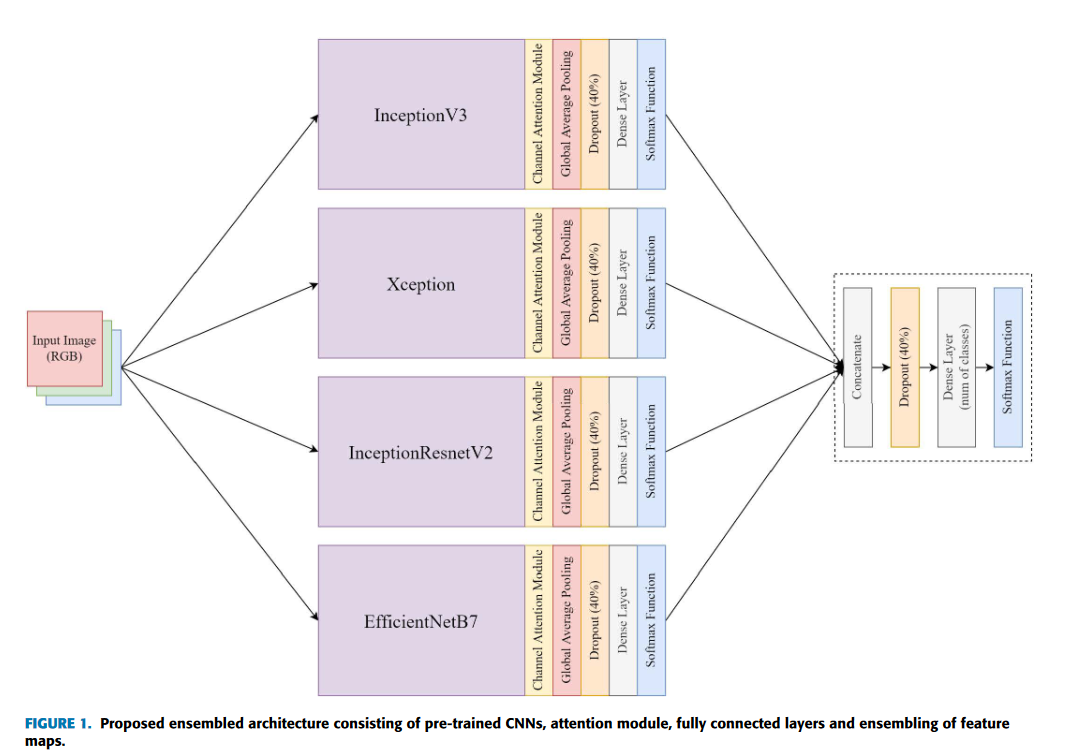

signbank.cls.ru.nl/dataset/jsl


nii.ac.jp/dsc/idr//rdata/Kosign/

    Recurrent Neural Networks (RNNs): RNNs are useful for sequential data analysis, making them a good fit for EMG signal classification. Pre-trained RNN models like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) can be used for this purpose.

    WaveNet: WaveNet is a deep generative model that has been successfully used for speech and audio processing. It can also be used for EMG signal classification, as it is able to model complex temporal patterns in the signal.

    Transformer: The Transformer model is a type of neural network architecture that has been shown to be effective for sequence modeling tasks. It has been used for speech recognition and natural language processing, and can also be applied to EMG signal classification.

    DenseNet: DenseNet is a CNN architecture that has been shown to be effective for image classification tasks. However, it can also be applied to 1D signal classification, including EMG signals.

These pre-trained models can be fine-tuned on EMG signal datasets to improve their performance on this specific task.
